# 確率変数と確率分布

確率モデルを学ぶ上での基礎知識。

In [1]:
import random
import matplotlib.pyplot as plt
import japanize_matplotlib
import numpy as np


---

## 確率変数

値が確率的に決まる変数。ランダムに値が決まる変数。確率そのものではないので注意。

確率変数の例は以下である。
- サイコロを一回振った時に出る目
- 宝くじの当選番号

上記は「確率的」という表現が一般的に納得できると私が感じた例である。しかし本当にそうだろうか。

物質の最小単位は素粒子であるため、素粒子が物理法則に完全に従う場合、あらゆる事象にランダム性が存在しないと言える。  
このことから、未来は既に決まっており、また宇宙に存在する全ての素粒子の状態が把握できた場合、あらゆる未来を完璧に予測出来るなんて話はラプラスの悪魔として有名。

あらゆる事象にランダム性が存在しないということは、確率変数なんてものはこの世に存在しないのかもね。全ての値が確定的に決まることになる。  
ただ、実はラプラスの悪魔は量子力学によって否定されている。素粒子の挙動にランダム性が見つかったためである。

さてそうなると、今度は逆にあらゆる事象にランダム性が存在することとなり、結果あらゆる変数が確率変数と言えてしまうね。

では何をもって確率変数を定義すればよいだろう。

実は、確率モデルの世界ではあらゆる変数を確率変数と見做している。  
あらゆる事象の裏に確率分布が存在すると考え、得られたデータからそれを推定する。


---

## 確率分布

確率変数がとりうる値とその確率を表したもの。

確率分布は$p(x)$と表記する。  
確率分布は常に0以上で、また総和が1でないといけない。

$$
p(x) \geq 0, \quad \sum_{x} p(x) = 1
$$

確率分布は多くの場合でパラメータを持つ。パラメータはその分布の詳細な形を決める。  
確率分布がパラメータに従うことを明示したい場合は以下のように表記する。
- $p(x;\theta)$
- $p(x|\theta)$

$\theta$がパラメータ。  
下の方は条件付き確率で多く使うので、パラメータを明示したい場合は上の方がいいかも。

確率分布は離散型と連続型に分けられる。

### 離散型確率分布

確率変数が離散的な場合の確率分布。

例として、サイコロを一回振った時に出る目を確率変数$x$として考える。  
このとき、$x$が取り得る値とその確率$p(x)$は以下のように表せる。

| $x$ | 1 | 2 | 3 | 4 | 5 | 6 |
| --- | --- | --- | --- | --- | --- | --- |
| $p(x)$ | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 | 1/6 |

棒グラフにするとこう

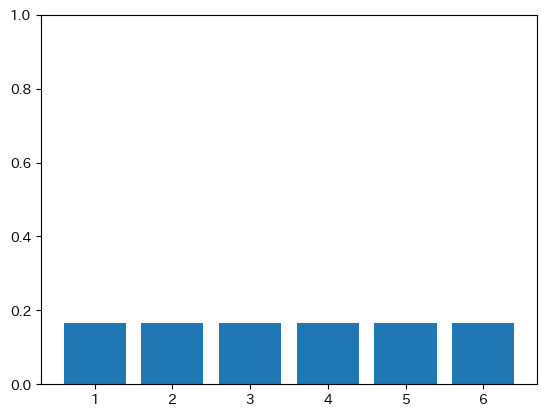

In [2]:
x = [1, 2, 3, 4, 5, 6]
p = [1/6, 1/6, 1/6, 1/6, 1/6, 1/6]
plt.bar(x, p)
plt.ylim(0, 1);

数式で表すとこう。

$$
p(x) = \frac{1}{6}
$$

これらが$x$の確率分布である。

### 連続型確率分布

確率変数が連続的な場合の確率分布。

確率変数がある範囲から得られる確率が、その範囲の積分によって求められるような関数で表す。この関数は**確率密度関数**と呼ばれる。  
よく「確率は面積である」という解釈を見るが、それはこの確率密度関数を理解することで納得できるかも。

例として、正規分布という連続型確率分布をみてみよう。これは以下の確率密度関数で表される。

$$
p(x;\mu,\sigma) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

$\mu, \sigma$は正規分布が持つ二つのパラメータ。$\mu, \sigma = 0, 1$として分布のグラフを見てみよう。

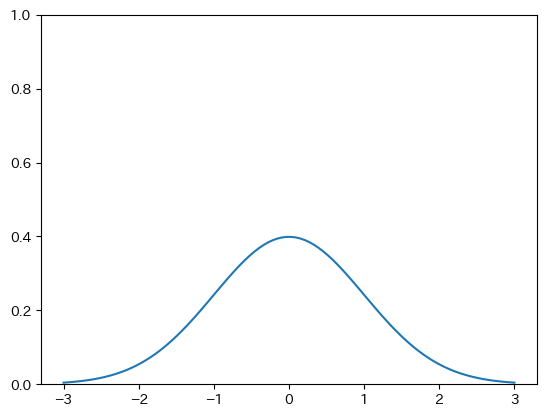

In [9]:
x = np.linspace(-3, 3, 100)
mu, sigma = 0, 1
p = lambda x: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, p(x))
plt.ylim(0, 1);

この縦軸は密度と呼ぶ。

### 主要な分布

いくつかの主要な分布を紹介する。

#### 一様分布

*Uniform Distribution*, 離散型・連続型

任意の範囲で同じ値を取る分布

$$
p(x) = \frac{1}{b-a} \quad (a \leq x \leq b)
$$

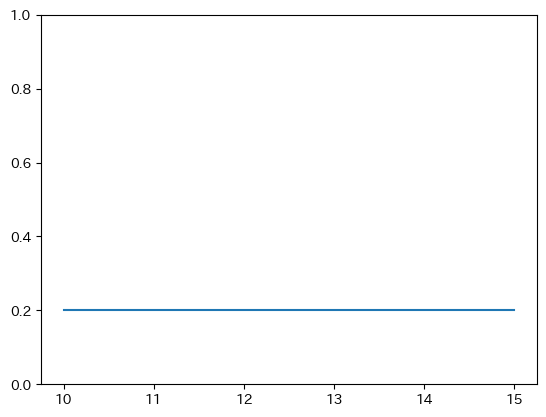

In [11]:
a, b = 10, 15
x = np.linspace(a, b, 100)
p = lambda x: 1 / (b - a) * np.ones_like(x)
plt.plot(x, p(x))
plt.ylim(0, 1);

#### ベルヌーイ分布

*Bernoulli Distribution*, 離散型

二通りの結果があり、片方が確率$\theta$、もう片方が確率$1-\theta$で起こるときの分布。  
二つの結果を0,1で表すと以下の式で表せる。

$$
p(x;\theta) = \theta^x(1-\theta)^{1-x}
$$

$\theta$が確率。1が起こる確率。

- $p(x=0) = \theta^0(1-\theta)^{1-0} = 1-\theta$
- $p(x=1) = \theta^1(1-\theta)^{1-1} = \theta$

結果が二通りしか得られない様な試行は**ベルヌーイ試行**と呼ばれる。コイン投げなどが例。

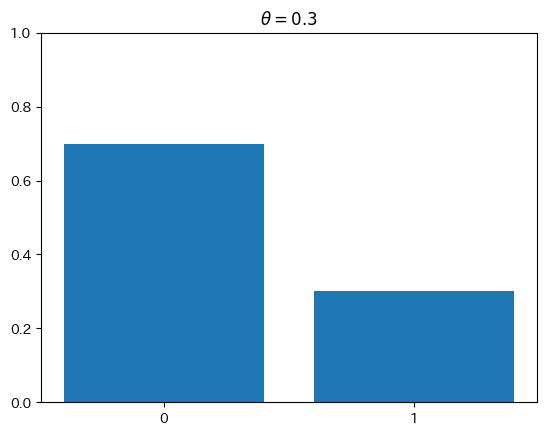

In [20]:
x = np.array([0, 1])
theta = 0.3
p = lambda x: theta**x * (1-theta)**(1-x)
plt.bar(x, p(x))
plt.title(rf'$\theta={theta}$')
plt.xticks(x)
plt.ylim(0, 1);

#### 正規分布

*Normal Distribution*, ガウス分布（*Gaussian Distribution*）とも, 連続型

最も一般的な分布。平均が最も密度が高く、そこから離れるにつれて密度が低くなるようなよく見る分布。  
平均と分散の2つのパラメータで決まる。

$$
p(x;\mu,\sigma^2) = \frac{1}{\sqrt{2\pi\sigma^2}}\exp\left(-\frac{(x-\mu)^2}{2\sigma^2}\right)
$$

正規分布であることを明示するために以下のように表記することもある。
- $N(x)$
- $\mathcal N(x)$

また平均0, 分散1の正規分布は標準正規分布と呼ぶ。

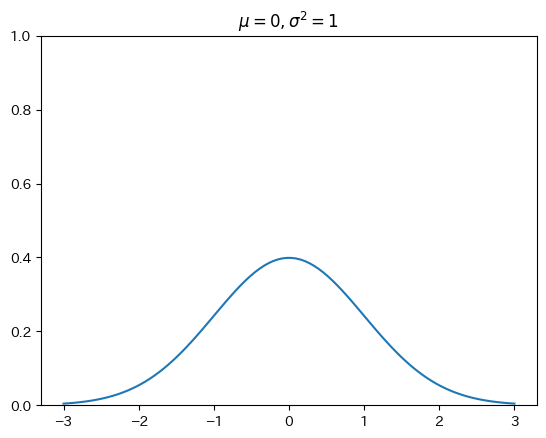

In [21]:
x = np.linspace(-3, 3, 100)
mu, sigma = 0, 1
p = lambda x: 1/np.sqrt(2*np.pi*sigma**2)*np.exp(-(x-mu)**2/(2*sigma**2))
plt.plot(x, p(x))
plt.title(rf'$\mu={mu}, \sigma^2={sigma**2}$')
plt.ylim(0, 1);


---

## 尤度

*Likelihood*

観測値$x$の尤もらしさ。  
「尤も（もっとも）」というのは「理に適っている」という意味。「ご尤もです」なんかがよく遭遇する言葉かも。

しっかり定義すると、尤度とは、観測値（何か具体的な確率変数）$x_i$をその確率密度関数に代入して得られた値$p(x_i)$のこと。  
確率密度関数の、$x_i$に対応する密度。

$p(x)$と表記するので、一見確率のようにも見える。実際、確率変数が離散的である場合、尤度$p(x)$は$x$の確率と一致する。しかし連続的な場合は一致しない。そもそも連続的な確率変数において、ある$x$が得られる確率は定義できない。ある一点が与えられても積分できないからね。  
$p(x)$は$x$の尤度か確率分布そのものを表していると見れば問題ない。

尤度は、離散的な確率変数における確率を一般化して、連続的な場合でも同等の議論が出来るようにしたもの、と捉えてもいいかもね。しらんけど

また尤度は確率変数だけでなく標本$X=\{ x_1, x_2, \cdots, x_n \}$に対しても定義でき、それは各サンプルの尤度の積となる。

$$
p(X) = \prod_{i=1}^{n} p(x_i)
$$


---

## 期待値

*Expected Value*

確率変数の平均値。

尤度で重みをつけた平均値。加重平均。確率変数$x$の期待値$\mathbb E[x]$は以下。

$$
\mathbb E[x] = \sum_x p(x)x
$$

連続値の場合は積分。  
確率変数が取り得る全ての値について、その値が出る確率をかけて足し合わせる。

サイコロを一回振った時に出る目を$x$とすると、$\mathbb E[x]$は以下。

$$
\mathbb E[x] = \sum_{i=1}^6 i \cdot \frac{1}{6} = \frac{1}{6} \cdot (1 + 2 + 3 + 4 + 5 + 6) = 3.5
$$

また、分布を明確にするために以下のように表記することもある。

- $\mathbb E_{p(x)}[x]$
- $\mathbb E_{x\sim p(x)}[x]$

$x\sim p(x)$は$x$が分布$p(x)$からサンプリングされていることを意味する。  
本来とは異なる分布で期待値をとる場面が存在し、区別したい場合などで使う。

### 大数の法則

$n$回の試行によって得られた$n$個の観測値$(x_1, x_2, \cdots, x_n)$の平均は、$n$が大きくなればなるほど期待値に近づく。

$$
\lim_{n \to \infty} \frac{1}{n} \sum_{i=1}^n x_i = \mathbb E[x]

サイコロの例を実装して確認してみよう。

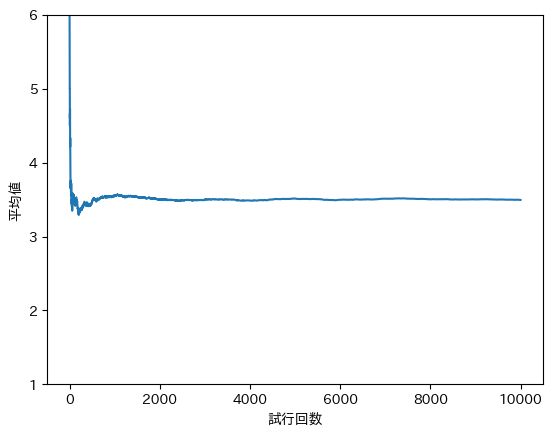

In [4]:
import random

n = 10000
values = [] # 出た目のリスト
expected_values = [] # 期待値のリスト
for _ in range(n):
    value = random.randint(1, 6) # サイコロを振る
    values.append(value) # 出た目をリストに追加
    expected_value = sum(values) / len(values) # 期待値を計算
    expected_values.append(expected_value) # 期待値をリストに追加

plt.plot(expected_values)
plt.xlabel("試行回数")
plt.ylabel("平均値")
plt.ylim(1, 6);

試行回数を重ねるにつれて平均値が期待値3.5に近づいていることが分かる。